# Web crawling & searching - SVD
### Author: Jakub Kosmydel

### Notes
In order to run the search engine with simple GUI you can just go to **Step 6**. All other steps show how the files were prepared (preparation takes a lot of time).


### Project structure:
- `Frontend` - folder with frontend app written in Angular 2 (needs backend),
- `processed_sites`- folder with one example file after processing,
- `processed_sites_mini`- folder with one example file after processing,
- `wiki` - folder with one example crawled website,
- `crawler.py` - program to crawl wikipedia with multiprocessing,
- `flask_backend.py` - backend program for Frontend,
- `prepare_array.py` - program to create *term-by-document matrix* A,
- `process_crawled_files.py` - program to process crawled files (count words etc.),
- others: generated example data for frontend and backend.

### Step 1: Crawl files from website
To crawl websites configure and run file `crawler.py`.

**Parameters:**
- `N` - number of processes,
- `MAX_DEPTH` - maximum BFS depth from START_WEBPAGES topics,
- `START_WEBPAGES` - starting wikipedia topics in format: `/wiki/TOPIC`.

It works only on Linux because it uses multiprocessing.

**Keys used for crawling:**

Music, Entertainment, England, World, Astronomy, Physics, Computer_Science, AGH, Economy, History, Religion, Film, Nature, Bee, Animal, Art, Food, Religion, Warfare, Language, Geography, Transport, Television, Philosophy, Video_game

### Step 2: Preprocess the files and generate dictionary
Take all crawled websites and count words in each page. Save all data in files. Create a dictionary with selected words and save it to json file.

**Instruction:**
- create folder for websites data e.g. `./processed_sites/`,
- run cell below.

**Parameters:**
- `output` - file to store dictionary JSON,
- `processed_output` - folder to store processed sites,
- `directory` - input folder with crawled websites,
- `cut_top` - amount of top occurring words removed (0-1),
- `cut_bottom` - amount of least occurring words removed (0-1),
- `min_occurrences` - words with fewer occurrences than that will be removed,
- `files_to_process` - limit of websites processed.

In [1]:
from process_crawled_files import process_files

In [ ]:
process_files(output="main_dictionary.json",
			  processed_output="./processed_sites/",
			  directory="./wiki",
			  cut_top=0.01,
			  cut_bottom=0.9,
			  min_occurrences=2,
			  files_to_process=25000)

process_files(output="mini_dictionary.json",
			  processed_output="./processed_sites_mini/",
			  directory="./wiki",
			  cut_top=0.01,
			  cut_bottom=0.6,
			  min_occurrences=2,
			  files_to_process=5000)

### Step 3: Prepare query matrix A
Prepare *term-by-document matrix* A and save it to file `output_file`.

**Parameters:**
- `dictionary` - path to dictionary JSON,
- `processed_dir` - path to processed sites' folder,
- `output_file` - prefix of files storing *term-by-document matrix* data.


In [ ]:
from prepare_array import make_array

In [ ]:
make_array(
	dictionary="main_dictionary.json",
	processed_dir="./processed_sites",
	files_prefix="./main_data",
)
make_array(
	dictionary="mini_dictionary.json",
	processed_dir="./processed_sites_mini",
	files_prefix="./mini_data",
)

### Step 4: Query example

In [1]:
# Configuration and imports
from prepare_array import load_data_from_file

Load main matrix

In [3]:
indexes1, A1, file_names1 = load_data_from_file(files_prefix="./main_data")

print(f'Loaded A1 with shape (words, files): {A1.shape}')

Loaded A1 with shape (words, files): (143946, 23857)


### Step 4: Query the matrix
Below you can see some examples of simple queries and results.

In [17]:
from prepare_array import query_data

def show_query_result(query, k=10):
    print(*query_data(query, indexes1, A1, file_names1, k=k), sep='\n')

In [18]:
show_query_result("computer music")

(0.7071017812219025, 'Timeline_of_quantum_computing.txt')
(0.7071017812219025, 'Computer_science_(disambiguation).txt')
(0.6549088885413071, 'Music.txt')
(0.6478570073966796, 'Computer_music.txt')
(0.6356342127287907, 'Pop_music.txt')
(0.6290440095080072, 'Music_therapy.txt')
(0.6256574498830526, 'Music_teacher.txt')
(0.6256574498830526, 'Music_education.txt')
(0.6114478668250756, 'Psychology_of_music_preference.txt')
(0.6094365491426024, 'Art_music.txt')


In [19]:
show_query_result("history england")

(0.6936864920544559, 'History_(disambiguation).txt')
(0.6284483523099351, 'England_(disambiguation).txt')
(0.508071434055148, 'Geography_of_England.txt')
(0.5025623958793434, 'England.txt')
(0.48645912089299137, 'Historiography_of_the_United_Kingdom.txt')
(0.4658501215116604, 'Public_history.txt')
(0.4648030708066037, 'England_and_Wales.txt')
(0.4547131062774891, 'World_history.txt')
(0.4499508384638383, 'Social_history.txt')
(0.4378030251434301, 'History.txt')


In [20]:
show_query_result("computer games")

(0.7746653674263343, 'Early_history_of_video_games.txt')
(0.7619421562278426, 'PC_game#History.txt')
(0.7619421562278426, 'PC_game.txt')
(0.7619374674241006, 'Pervasive_game.txt')
(0.7071017812219025, 'Timeline_of_quantum_computing.txt')
(0.7071017812219025, 'Computer_science_(disambiguation).txt')
(0.7068963826422499, 'Video_game.txt')
(0.7068963826422499, 'Video_game#Platform.txt')
(0.7068963826422499, 'Video_games.txt')
(0.6973195457799499, 'Early_mainframe_games.txt')


In [21]:
show_query_result("human rights")

Couldn't find word right...
(0.6261246772831954, 'Humans.txt')
(0.6261246772831954, 'Homo_sapiens.txt')
(0.6261246772831954, 'Human.txt')
(0.5763495149968239, 'Human_right.txt')
(0.5763495149968239, 'Human_rights.txt')
(0.5377856358612927, 'World_(disambiguation).txt')
(0.5247869464969901, 'Humanities.txt')
(0.4841717344201985, 'Human_science.txt')
(0.4840415293757371, 'Posthumanism.txt')
(0.45877847252754583, 'Transhumanism.txt')


### Step 5: SVD & low rank approximation
We use smaller matrix (5000 documents) because SVD process takes too long.

In [22]:
# Configuration and imports
from prepare_array import load_data_from_file, query_data, svd_process, load_matrix_from_file

query = 'computer math'

Load main matrix

In [26]:
indexes2, A2, file_names2 = load_data_from_file(files_prefix="./mini_data")

print(f'Loaded A2 with shape (words, files): {A2.shape}')

def show_query_svd(query, k):
    svd = svd_process(A2, k)
    print(*query_data(query, indexes2, svd, file_names2, k=10), sep='\n')

Loaded A2 with shape (words, files): (47874, 5000)


##### Create few decompositions and compare it


Test usage (without SVD):

In [27]:
show_query_result(query, k=10)

(0.7071017812219025, 'Timeline_of_quantum_computing.txt')
(0.7071017812219025, 'Computer_science_(disambiguation).txt')
(0.6658119436639307, 'Math_(disambiguation).txt')
(0.5819658489988704, 'Computer_scientist.txt')
(0.5818157229860258, 'Timeline_of_women_in_computing.txt')
(0.5785859906754436, 'Computer_science#Etymology.txt')
(0.5785859906754436, 'Computer_science.txt')
(0.5494509653994207, 'Outline_of_computers.txt')
(0.5489625711723451, 'Computing.txt')
(0.5421276229328675, 'List_of_computer_scientists.txt')


SVD with k=50

In [32]:
show_query_svd(query, 50)

(0.604620418889346, 'Computer_science_(disambiguation).txt')
(0.5539057795292022, 'Computer_science.txt')
(0.5539057795292022, 'Computer_science#Etymology.txt')
(0.5398531526076233, 'Computer_scientist.txt')
(0.5264561538951327, 'Computing.txt')
(0.5023346033946565, 'Computation.txt')
(0.46908801149038615, 'Computer.txt')
(0.46908801149038615, 'Computers.txt')
(0.46908801149038615, 'Computer_system.txt')
(0.46690974991696366, 'Computational_sciences.txt')


SVD with k=100

In [28]:
show_query_svd(query, 100)

(0.6471110287827495, 'Computer_science_(disambiguation).txt')
(0.5722856309560436, 'Computer_science#Etymology.txt')
(0.5722856309560436, 'Computer_science.txt')
(0.560010123434473, 'Computer_scientist.txt')
(0.5414630677377815, 'Computing.txt')
(0.529994417522484, 'Computation.txt')
(0.4847540489304169, 'Category_Computational_fields_of_study.txt')
(0.47943347003486064, 'Computational_science.txt')
(0.47943347003486064, 'Computational_sciences.txt')
(0.478784306808708, 'Computer_systems_in_the_Soviet_Union.txt')


SVD with k=500

In [33]:
show_query_svd(query, 500)

(0.6739257187774786, 'Computer_science_(disambiguation).txt')
(0.5774338381362327, 'Computer_science#Etymology.txt')
(0.5774338381362327, 'Computer_science.txt')
(0.5724716518978032, 'Computer_scientist.txt')
(0.5466946464005711, 'Computation.txt')
(0.5457527952708293, 'Computing.txt')
(0.5046895346827494, 'Category_Computational_fields_of_study.txt')
(0.4952069530911398, 'Computational_science.txt')
(0.4952069530911398, 'Computational_sciences.txt')
(0.4907041362937805, 'Computer_systems_in_the_Soviet_Union.txt')


SVD with k=750

In [34]:
show_query_svd(query, 750)

(0.6775611369731431, 'Computer_science_(disambiguation).txt')
(0.5782303352267857, 'Computer_science.txt')
(0.5782303352267857, 'Computer_science#Etymology.txt')
(0.5732816780218529, 'Computer_scientist.txt')
(0.5498096861855345, 'Computation.txt')
(0.5450574533035004, 'Computing.txt')
(0.5054417742312839, 'Category_Computational_fields_of_study.txt')
(0.49453287963635617, 'Computational_science.txt')
(0.49453287963635617, 'Computational_sciences.txt')
(0.4924865169742302, 'Computer_systems_in_the_Soviet_Union.txt')


SVD with k=1000

In [35]:
show_query_svd(query, 1000)

(0.6797698009717407, 'Computer_science_(disambiguation).txt')
(0.5788087112456581, 'Computer_science#Etymology.txt')
(0.5788087112456581, 'Computer_science.txt')
(0.5739177639034301, 'Computer_scientist.txt')
(0.5517056757514787, 'Computation.txt')
(0.5457514582514786, 'Computing.txt')
(0.5052458468596034, 'Category_Computational_fields_of_study.txt')
(0.49382682067250755, 'Computer_systems_in_the_Soviet_Union.txt')
(0.49137556926037285, 'Computational_science.txt')
(0.49137556926037285, 'Computational_sciences.txt')


#### Conclusion
The best results for 5000 files were with `k = 50`. Unfortunately, I couldn't run program for k higher than 1000 because of lack of memory.

### Step 6: Webpage
#### Backend
In order to run backend server type in terminal `export FLASK_APP=flask_backend` and then `flask run` and make sure it is running.
#### Frontend
To build and run frontend webpage go to `Frontend` folder and type `npm install` and `ng serve` in terminal. Make sure that you have Angular2, NodeJS and npm installed.
Frontend requires backend to be running.

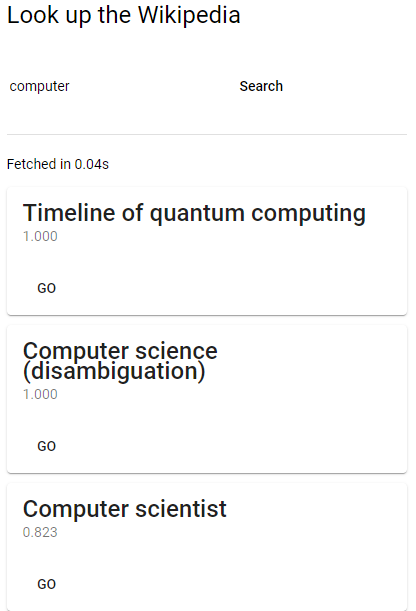

#### Statistics:
Typical query for ~25000 files takes around `0.05s`.